In [26]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import sunpy.map
from sunpy.net import Fido, attrs as a

In [27]:
q = Fido.search(
    a.Time('2012-09-24 08:30:00', '2012-09-24 09:30:00', near='2012-09-24 09:00:00'),
    a.Instrument.aia,
    a.Wavelength(171*u.AA),
)

In [7]:
file = Fido.fetch(q)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_171a_2012_09_24t08_59_59_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

In [8]:
m_aia_171 = sunpy.map.Map(file)

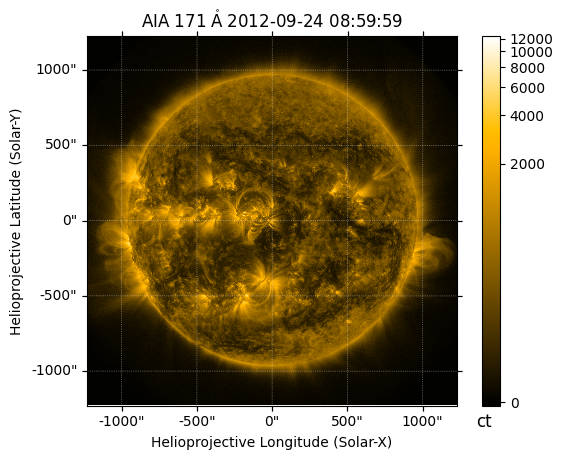

In [9]:
m_aia_171.peek()

In [21]:
blc = SkyCoord(Tx=-350*u.arcsec, Ty=-200*u.arcsec, frame=m_aia_171.coordinate_frame)
m_aia_171_sub = m_aia_171.submap(blc, width=500*u.arcsec, height=500*u.arcsec)

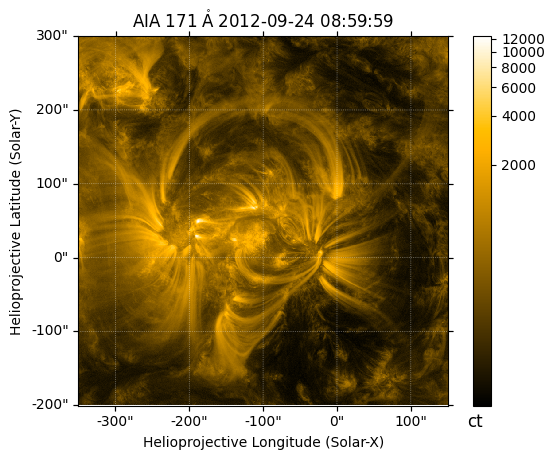

In [22]:
m_aia_171_sub.peek()

In [80]:
from synthesizAR.models import semi_circular_loop, semi_circular_bundle

In [124]:
center_point = SkyCoord(Tx=-118*u.arcsec, Ty=80*u.arcsec, frame=m_aia_171.coordinate_frame)
center_point = center_point.transform_to('heliographic_stonyhurst')
loop_obs = SkyCoord(lon=center_point.lon,
                    lat=center_point.lat,
                    radius=center_point.radius,
                    frame='heliographic_stonyhurst',
                    obstime=center_point.obstime)
length = 275*u.Mm
strand_kwargs = {
    'gamma': 0*u.deg,
    'inclination': 45*u.deg,
    'observer': loop_obs,
    'ellipticity': 0.7,
}
strand = semi_circular_loop(length, **strand_kwargs)
bundle = semi_circular_bundle(length, 5*u.Mm, 50, **strand_kwargs)

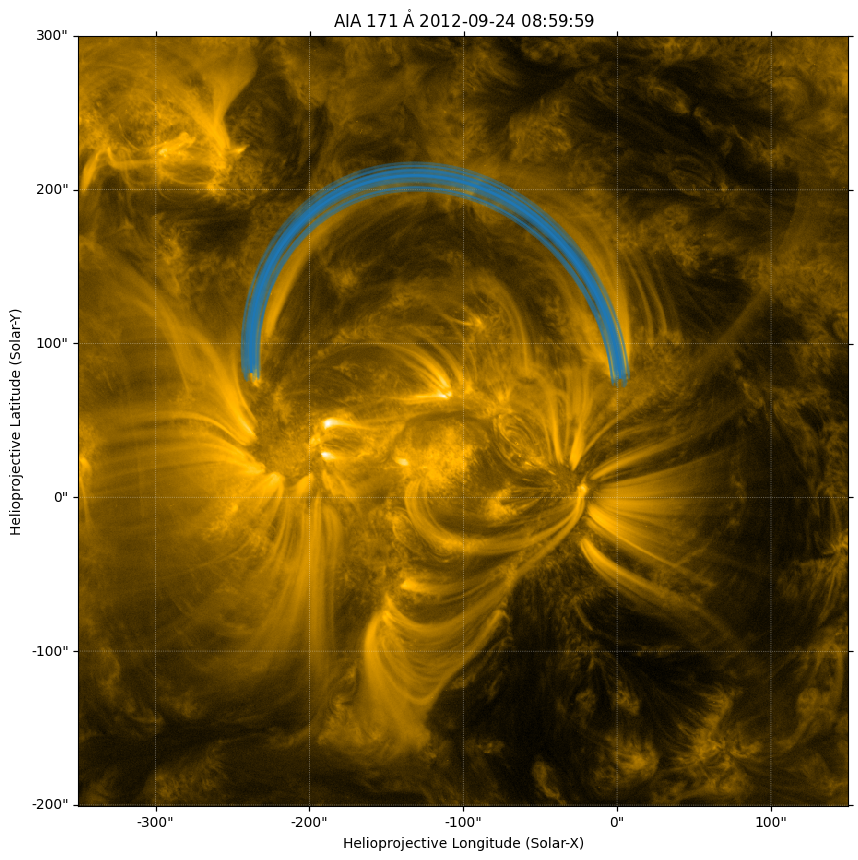

In [126]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=m_aia_171_sub)
m_aia_171_sub.plot(axes=ax)
ax.plot_coord(strand, color='C0', lw=2)
for _s in bundle:
    ax.plot_coord(_s, color='C0', alpha=0.25)